# Mastering basics using a librosa example
The aim of this notebook is to test and carry out a series of basic pre-processing and manipulation
operations using an example file from the librosa library. 
The aim is to master the basic techniques of audio data processing. 

In [1]:
# Let's start by importing the required packages
import numpy as np 
import matplotlib.pyplot as plt
import librosa, librosa.display
from IPython.display import Audio

figsize = (15,10)

##  Start working with an audio file

In [2]:
# Load a file from librosa.ex
file = librosa.ex('brahms')
Audio(data=file)

In [3]:
signal, sr = librosa.load(file)
print(f"Signal : {signal}\nsample rate :{sr}") 

"""
We can also load 10 seconds of a file, resample it or starting at a specific moment 
for example : 
librosa.load(file, sr = 11025, offset = 15.0, duration = 5.0)
In this code below we have resampled the signal to 11 Khz, loaded 5 seconds of the file, starting 15 seconds in 
"""

Signal : [-3.1496835e-05  4.5770053e-06  6.3310695e-06 ... -1.1488052e-05
 -7.4060167e-06 -8.0729487e-06]
sample rate :22050


## Visualizing the Audio 

### Waveplot
The code below show us the loudness (amplitude) of sound wave changing with time. 
(Amplitude = 0 represents silence)

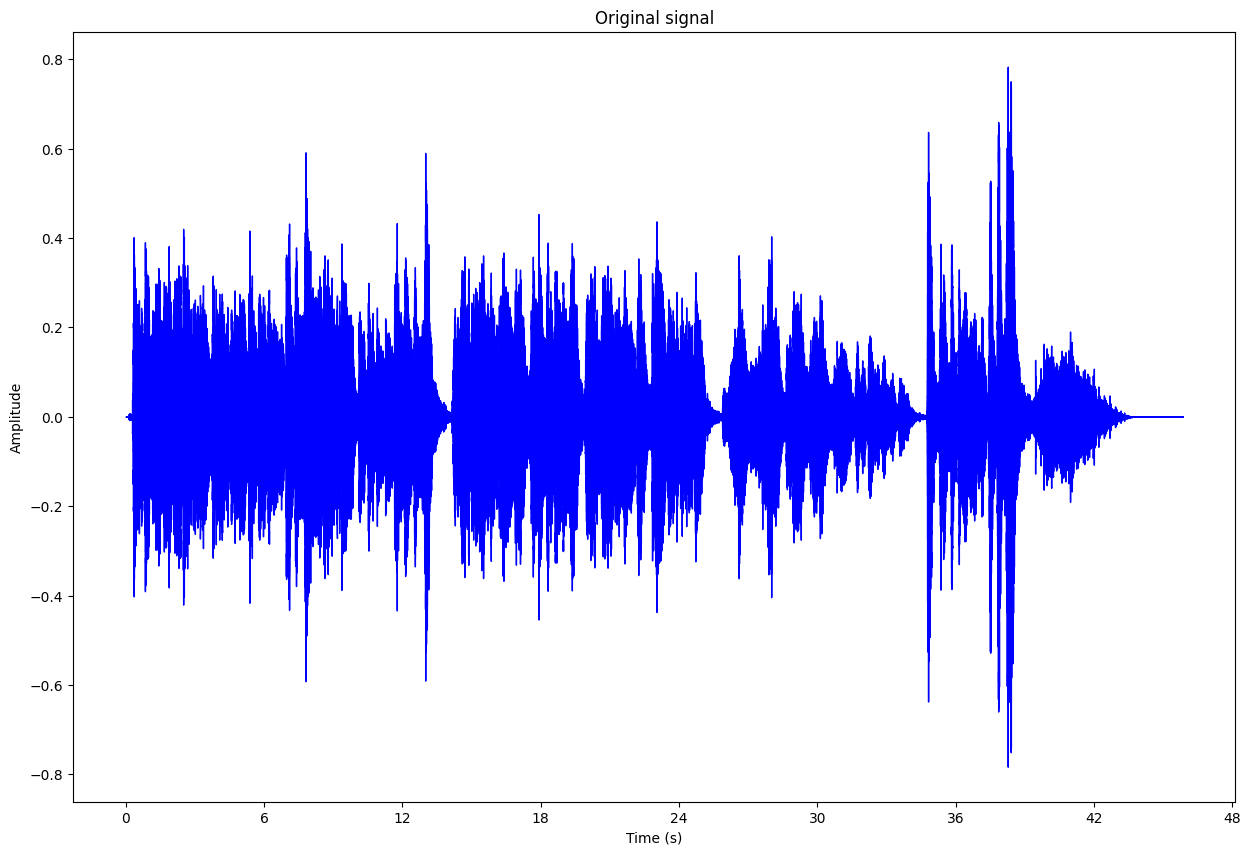

In [4]:
# Display the waveform of the audio file 
plt.figure(figsize=figsize)
librosa.display.waveshow(signal, sr=sr,color='blue')
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.title("Original signal")
plt.show()

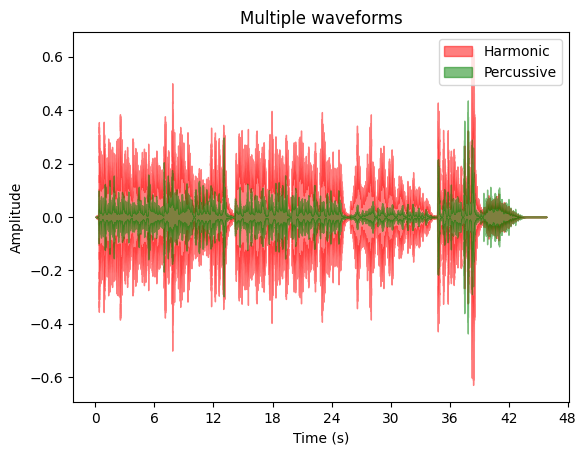

In [20]:
# Harmonic and percussive components with transparency 
y_harm,y_perc = librosa.effects.hpss(signal)
# librosa.display.waveshow(signal,sr=sr,color='blue')
librosa.display.waveshow(y_harm,sr=sr,color='red',alpha=0.5,label='Harmonic')
librosa.display.waveshow(y_perc,sr=sr,color='green',alpha=0.5,label='Percussive')
plt.title("Multiple waveforms")
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Sample view 
Let's zoom in on a plot to show raw samples values  

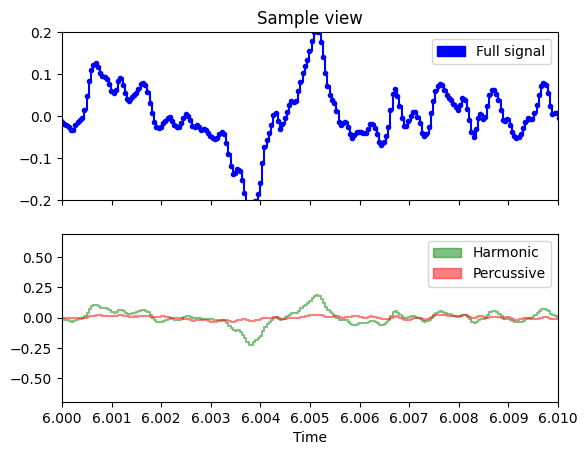

In [12]:
fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True)
ax.set(xlim=[6.0, 6.01], title='Sample view', ylim=[-0.2, 0.2])
librosa.display.waveshow(signal, sr=sr, ax=ax, marker='.', label='Full signal', color='blue')
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, color="green",label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
ax.label_outer()
ax.legend()
ax2.legend()

### Spectogram
A spectrogram provides a visual representation of a sound signal's frequency spectrum as it evolves over time, showing how different frequencies' amplitudes change within a signal. By employing the Short Term Fourier Transform (STFT), data is converted to reveal the amplitude of specific frequencies at precise moments. This allows for the identification of various frequency amplitudes present at any given time in an audio signal, effectively mapping out the sound's frequency and intensity landscape as it unfolds.

 

In [17]:
def display_spectogram(yaxis):
    spec = librosa.amplitude_to_db(abs(librosa.stft(signal)), ref=np.max)
    plt.figure(figsize=figsize)
    librosa.display.specshow(spec,sr=sr, x_axis='time',y_axis=yaxis)
    plt.colorbar(format='%+2.0f dB')

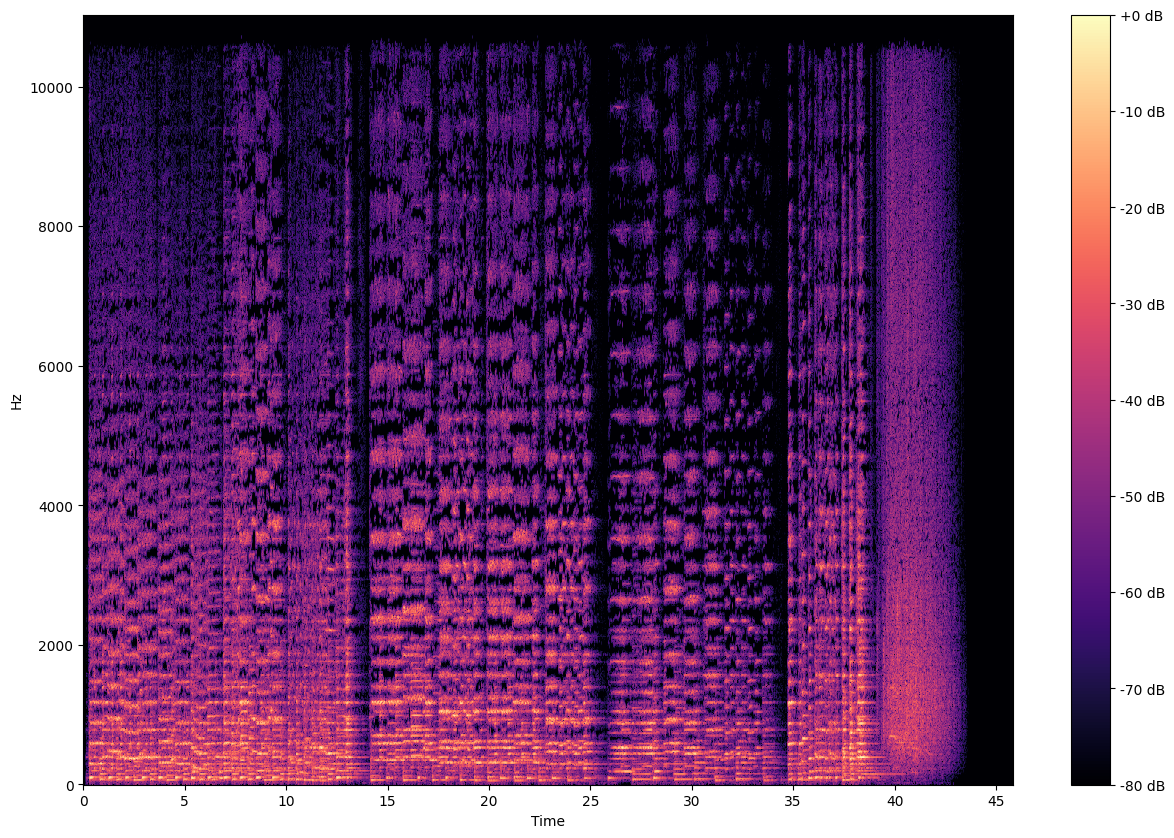

In [18]:
display_spectogram('hz')

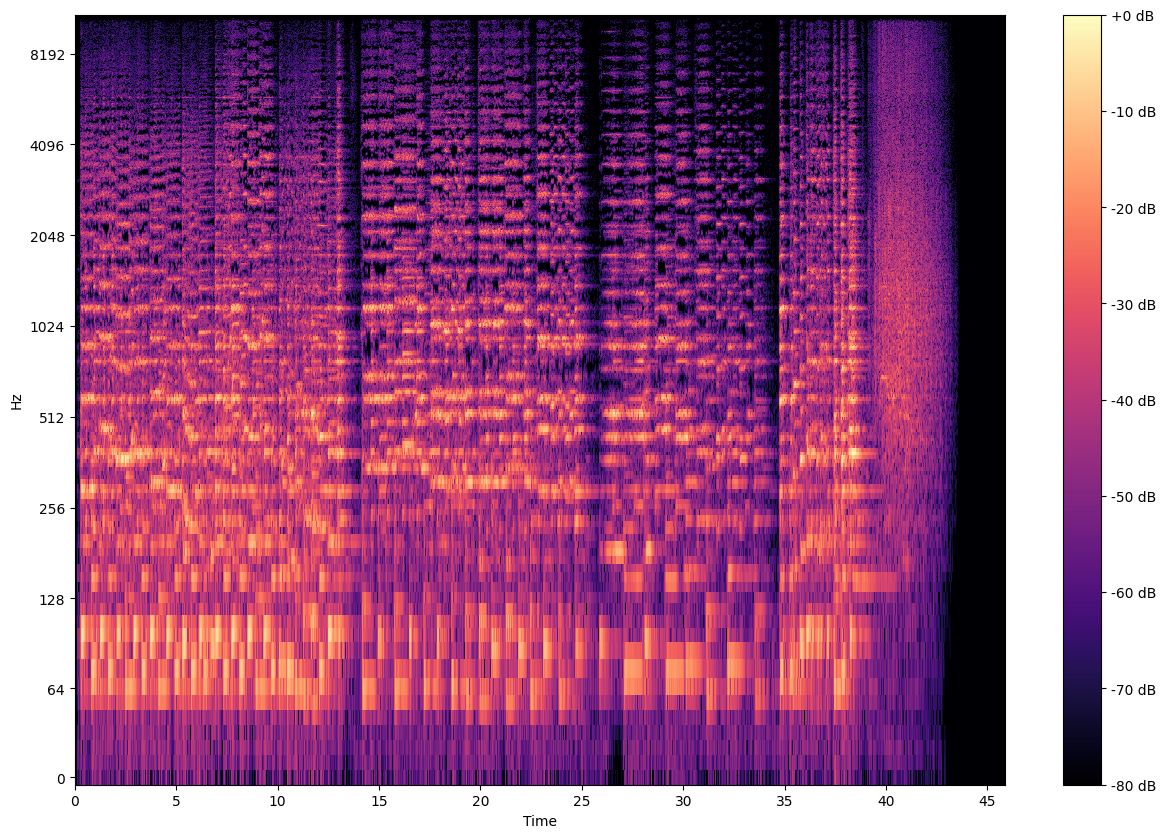

In [19]:
display_spectogram('log')

In addition to spectrogram, there are various other types of spectral data representations that will be explored in the following sections. 

## Feature extraction

Feature extraction is a crucial step in audio analysis, as it helps capture the audio signal's relevant characteristics. Below are some of the most important features that may be needed to build a model for an audio classification task or speech recognition for example. 

#### 1. Mel Frequency Cepstral Coefficient : MFCCs
This approach consists of windowing the signal, performing the Discrete Fourier Transform, calculating the log of the magnitude, and then warping the frequencies on a Mel scale prior to actually performing the inverse Discrete Cosine Transform

In [24]:
mfccs = librosa.feature.mfcc(y=signal, sr=sr)
print(mfccs.shape)

(20, 1975)


In this case, mfcc computed 20 MFCCs over 1975 frames. 

The first MFCC, also known as the 0th coefficient, doesn't provide useful details about the spectrum's shape. It just adds a fixed amount to the whole spectrum. Because of this, many people ignore this first MFCC when they are classifying sounds.

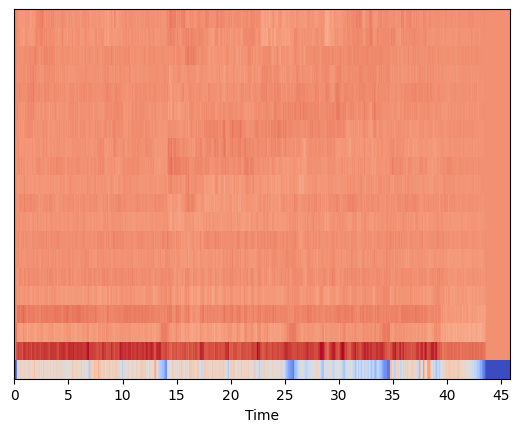

In [25]:
# Display the mfcss 
librosa.display.specshow(mfccs,sr=sr, x_axis='time')

#### 2. Chroma Feature
It iden

# References 
- Librosa documentation
- https://www.kaggle.com/code/jaseemck/audio-processing-using-librosa-for-beginners
- https://www.analyticsvidhya.com/blog/2024/01/hands-on-guide-to-librosa-for-handling-audio-files/
- https://medium.com/@yaditi1303/pre-processing-of-audio-data-e99718830e67